# Michaelis-Menten kinetics dynamics

### The Michaelis-Menten kinetics is given by the following system of (coupled) ordinary differential equations (ODEs):

$$
\dot{x}^{(\nu)}_i = -x^{(\nu)}_i + \sum_j w_{i,j} \cdot \frac{x^{(\nu)}_j}{1 + x^{(\nu)}_j}, \quad i, j \in \{1, \dots, N\}
$$

In [343]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint  # Import the odeint function from scipy for solving ODEs
from scipy.integrate import solve_ivp  # Import the solve_ivp function from scipy for solving ODEs
import random

In [344]:
# Set up the system of ODEs
def ode_system(x, t, W):  # t must be passed even if not used
    N = len(x)  # Get the number of elements in the state vector
    derivative_vector = np.zeros(N)  # Initialize the derivative vector (set zeros as default)
    for i in range(N):  # Loop over each element in the state vector
        # Compute the sum term for the i-th element according to the formula given in the paper
        sum_term = sum(W[i, j] * (x[j] / (1 + x[j])) for j in range(N) if j != i)  # list comprehension
        derivative_vector[i] = -x[i] + sum_term
    return derivative_vector

In [345]:
# Initialize parameters
N = 100  # Number of genes in a cell
avg_deg = 3  # Average degree of the GRN
M = 50  # Number of "mutations" of the matrix W
W = [np.zeros((N, N)) for _ in range(M)] # Initialize the weight matrix with zeros; W[mutation number, row, column]
initial_conditions = [np.random.rand(N) for _ in range(N)]  # Initialize the initial conditions for each mutation

dist = lambda p: random.random() < p # dist will return true with probability p
q = 1 # Affects the range of the random numbers generated
p = 0.3  # Probability to change the non-zero elements (mutate the weight matrix)

num_of_time_stamps = 1000
t_final = 10
t = np.linspace(0, t_final, num_of_time_stamps)

# Set up the time points for the simulation # TODO: Figure out how to make the odeint function stop when the system reaches a steady state or after a certain time period

In [346]:
# Set the base weight matrix
for i in range(N):
    W[0][i] = [np.random.uniform(0, 2 * q) if (i != j and dist(avg_deg / (N - 1))) else 0 for j in range(N)]

# Create mutations of the weight matrix
base_model = W[0]
for m in range(M):
    for i in range(N):
        for j in range(N):
            if base_model[i, j] != 0:
                W[m][i, j] = np.random.uniform(0, 2 * q) if dist(p) else base_model[i, j]
            else:
                W[m][i, j] = 0

In [347]:
# Initialize the results array
results = [np.zeros((num_of_time_stamps, N)) for _ in range(M)]

# Solve the ODEs for each mutation and its corresponding weight matrix and initial conditions
for m in range(M):
    results[m] = odeint(ode_system, initial_conditions[m], t, args=(W[m],))

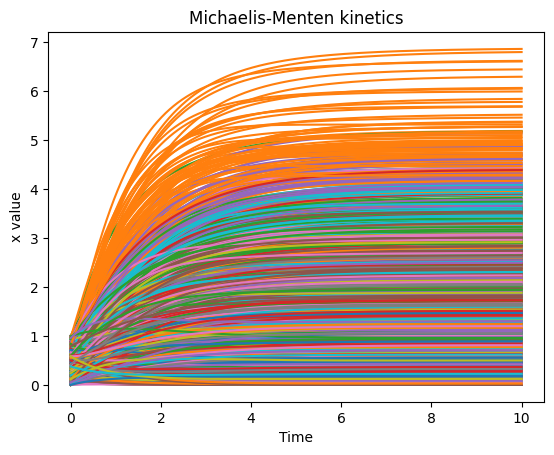

In [353]:
# Plot the results
for aa in range(M):
    for q in range(N):
        plt.plot(t, results[aa][:, q])
plt.xlabel('Time')
plt.ylabel('x value')
plt.title('Michaelis-Menten kinetics')
plt.show()

In [349]:
# initial state
results[0][0, :]

array([0.28172211, 0.56272889, 0.92707974, 0.88994491, 0.10196681,
       0.55280137, 0.31184311, 0.21590714, 0.78946297, 0.80924028,
       0.35205548, 0.98322712, 0.02689316, 0.08799434, 0.79670089,
       0.22320757, 0.35776565, 0.50708206, 0.78966578, 0.42418237,
       0.56935091, 0.28810536, 0.69661683, 0.20540342, 0.08537294,
       0.49690993, 0.26584567, 0.15646734, 0.6910768 , 0.41247221,
       0.80256377, 0.10766591, 0.23212394, 0.85470289, 0.44604256,
       0.61845335, 0.34446891, 0.14334044, 0.84189125, 0.30061954,
       0.08869338, 0.01183382, 0.7460352 , 0.87791961, 0.9068845 ,
       0.99593269, 0.24299789, 0.49167056, 0.50288239, 0.78076289,
       0.02358797, 0.71732849, 0.98198217, 0.78358374, 0.12629623,
       0.25417539, 0.33211768, 0.00466958, 0.0404184 , 0.80428557,
       0.27348119, 0.52558372, 0.57035787, 0.73473223, 0.84953965,
       0.2454608 , 0.81373455, 0.09016655, 0.27228599, 0.23064771,
       0.97477359, 0.33882518, 0.59836856, 0.20122086, 0.13908

In [363]:
final_state = [np.random.rand(N) for _ in range(N)]
# final state
for m in range(M):
    final_state[m] = results[m][-1, :]

In [365]:
# Save the final state vector to a csv file
np.savetxt('final_state.csv', final_state, delimiter=',')